# The Knapsack problem

- Juan Pablo Echeagaray González
- A00830646
- 22 de septiembre del 2022

## Dependencias

In [1]:
from ortools.algorithms import pywrapknapsack_solver
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


## Valores de prueba

In [2]:
# Valores
values = [4, 2, 10, 1, 2]
weights = [[12, 1, 4, 1, 2]]
capacity = [15]


## Solución con Heurístico

In [3]:
def heuristic_solver(values: list, weights: list, capacity: list, return_results: bool):
    real_weights = weights[0]
    importance = [v / w for v, w in zip(values, real_weights)]
    added = []
    cap = 0
    while cap < capacity[0]:
        max_index = importance.index(max(importance))
        cap += real_weights[max_index]
        if cap <= capacity[0]:
            added.append(max_index)
        importance[max_index] = 0

    if return_results:
        print(f"Total value: {sum([values[i] for i in added])}")
        print(f"Total weight: {sum([real_weights[i] for i in added])}")
        print(f"Items added: {added}")


## Solución con solver

In [4]:
def knapsack_solver(values: list, weights: list, capacity: list, solver_type: str, return_results: bool):
    
    if solver_type == 'SCIP-MIP':
        solver = pywrapknapsack_solver.KnapsackSolver(
            pywrapknapsack_solver.KnapsackSolver.KNAPSACK_MULTIDIMENSION_SCIP_MIP_SOLVER, 'Knapsack MIP')
    elif solver_type == 'SCIP-BRANCH-AND-BOUND':
        solver = pywrapknapsack_solver.KnapsackSolver(
            pywrapknapsack_solver.KnapsackSolver.KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER, 'Knapsack B&B')
    elif solver_type == 'DYNAMIC-PROGRAMMING':
        solver = pywrapknapsack_solver.KnapsackSolver(
            pywrapknapsack_solver.KnapsackSolver.KNAPSACK_DYNAMIC_PROGRAMMING_SOLVER, 'Knapsack DP')
    elif solver_type == 'DIVIDE-AND-CONQUER':
        solver = pywrapknapsack_solver.KnapsackSolver(
            pywrapknapsack_solver.KnapsackSolver.KNAPSACK_DIVIDE_AND_CONQUER_SOLVER, 'Knapsack DC')
    elif solver_type == 'BRUTE-FORCE':
        solver = pywrapknapsack_solver.KnapsackSolver(
            pywrapknapsack_solver.KnapsackSolver.KNAPSACK_BRUTE_FORCE_SOLVER, 'Knapsack BF')
    elif solver_type == '64-ITEMS':
        solver = pywrapknapsack_solver.KnapsackSolver(
            pywrapknapsack_solver.KnapsackSolver.KNAPSACK_64ITEMS_SOLVER, 'Knapsack 64')


    solver.Init(values, weights, capacity)
    computed_value = solver.Solve()
    packed_items = []
    packed_weights = []
    total_weight = 0

    for i in range(len(values)):
        if solver.BestSolutionContains(i):
            packed_items.append(i)
            packed_weights.append(weights[0][i])
            total_weight += weights[0][i]

    if return_results:
        print('Total value =', computed_value)
        print('Packed items:', packed_items)
        print('Packed_weights:', packed_weights)
        print('Total weight:', total_weight)


## Comparación de soluciones

In [5]:
def test_time():
    pos_solvers = ['SCIP-MIP', 'SCIP-BRANCH-AND-BOUND', 'DYNAMIC-PROGRAMMING', 'DIVIDE-AND-CONQUER', 'BRUTE-FORCE', '64-ITEMS', 'HEURISTIC']
    results = pd.DataFrame(columns=['Solver', 'Time'])

    for solver in pos_solvers:
        if solver == 'HEURISTIC':
            time = %timeit -n 1000 -r 10 -o heuristic_solver(values, weights, capacity, return_results=False)
        else:
            time = %timeit -n 1000 -r 10 -o knapsack_solver(values, weights, capacity, solver, return_results=False)
        results = pd.concat([results, pd.DataFrame({'Solver': solver, 'Time': time.all_runs})], ignore_index=True)

    return results
    

## Visualización de resultados

In [6]:
# Check if there exists already a file with the results
if Path('results.csv').is_file():
    results = pd.read_csv('results.csv')
else:
    times = test_time()
    results = times.explode('Time')
    results.to_csv('results.csv', index=False)


3.52 ms ± 129 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)
5.62 µs ± 387 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
5.18 µs ± 541 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
5.18 µs ± 552 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
4.89 µs ± 653 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
6.39 µs ± 827 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
3.48 µs ± 568 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)


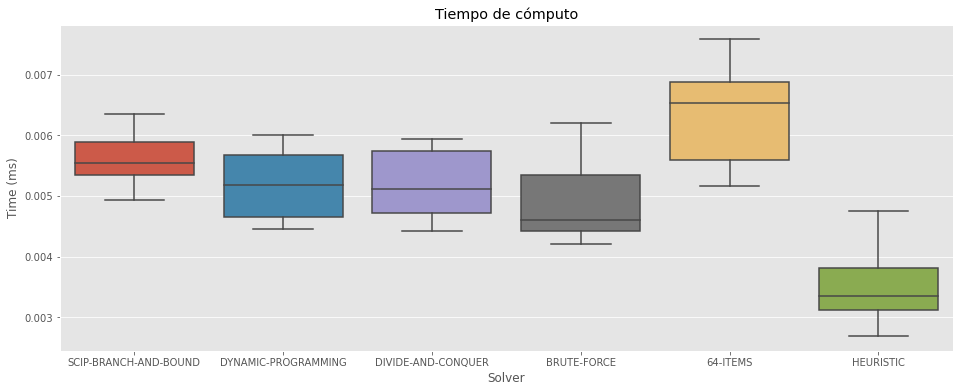

In [8]:
# Drop rows with SCIP-MIPtimes = test_time()
results = results[results.Solver != 'SCIP-MIP']

plt.figure(figsize=(16, 6))
sns.boxplot(x='Solver', y='Time', data=results)
plt.xlabel('Solver')
plt.ylabel('Time (ms)')
plt.title('Tiempo de cómputo')
plt.show()


In [9]:
knapsack_solver(values, weights, capacity, 'DYNAMIC-PROGRAMMING', return_results=True)


Total value = 15
Packed items: [1, 2, 3, 4]
Packed_weights: [1, 4, 1, 2]
Total weight: 8
